In [ ]:
pip install hazm

In [2]:
import pandas as pd
import numpy as np
import hazm
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# EDA

In [3]:
data = pd.read_csv('per.csv')
data

,NewsID,Title,Body,Date,Time,Category,Category2
0,843656,\nوزير علوم درجمع استادان نمونه: سن بازنشستگي ...,\nوزير علوم در جمع استادان نمونه كشور گفت: از ...,\n138/5//09,\n0:9::18,\nآموزشي-,\nآموزشي
1,837144,\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سوره...,\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجويا...,\n138/5//09,\n1:4::11,\nآموزشي-,\nآموزشي
2,436862,\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور...,\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و...,\n138/3//07,\n1:0::03,\nآموزشي-,\nآموزشي
3,227781,\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي در...,\n,\n138/2//02,\n1:3::42,\nاجتماعي-خانواده-,\nاجتماعي
4,174187,\nوضعيت اقتصادي و ميزان تحصيلات والدين از مهمت...,\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در اي...,\n138/1//08,\n1:1::49,\nآموزشي-,\nآموزشي
...,...,...,...,...,...,...,...
10994,252520,\n/گزارش/ «حقي» حق خود را با طلا گرفت,\nبه گزارش ايسنا، در كوران مسابقات دوچرخه سوار...,\n138/2//04,\n1:3::33,\nقهرماني-همگاني-,\nورزشي
10995,899807,\nمدير تيم‌هاي ملي كشتي فرنگي: نفرات اول تا سو...,\nمحمد دليريان در گفت‌وگو با خبرنگار كشتي خبرگ...,\n138/6//01,\n1:2::42,\nورزشي-كشتي-,\nورزشي
10996,432925,\nتساوي چلسي و ادامه صدرنشيني آرسنال تساوي اشت...,\nبه گزارش خبرگزاري دانشجويان ايران (ايسنا)، د...,\n138/3//06,\n1:0::39,\nورزشي-فوتبال-,\nورزشي
10997,736914,\nشكست ايران از پرتغال در آيينه‌ي خبرگزاري‌ها:...,\nبه گزارش خبرگزاري دانشجويان ايران (ايسنا)، ا...,\n138/5//03,\n2:0::13,\nجام جهاني 2010-,\nورزشي


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NewsID     10999 non-null  int64 
 1   Title      10999 non-null  object
 2   Body       10999 non-null  object
 3   Date       10999 non-null  object
 4   Time       10999 non-null  object
 5   Category   10999 non-null  object
 6   Category2  10999 non-null  object
dtypes: int64(1), object(6)
memory usage: 601.6+ KB


In [5]:
data.isnull().sum()

NewsID       0
Title        0
Body         0
Date         0
Time         0
Category     0
Category2    0
dtype: int64

In [6]:
data.Category2.unique()

array(['\nآموزشي', '\nاجتماعي', '\nتاريخي', '\nاقتصادي', '\nبهداشتي',
       '\nعلمي', '\nسياسي', '\nفرهنگي', '\nفقه و حقوق', '\nمذهبي',
       '\nورزشي'], dtype=object)

In [7]:
data.Category2.value_counts()

\nآموزشي        1000
\nاجتماعي       1000
\nاقتصادي       1000
\nبهداشتي       1000
\nعلمي          1000
\nسياسي         1000
\nفرهنگي        1000
\nفقه و حقوق    1000
\nمذهبي         1000
\nورزشي         1000
\nتاريخي         999
Name: Category2, dtype: int64

# Preprocessing

In [8]:
nltk.download('stopwords')
with open('stopwords-Copy1.txt', 'r', encoding="utf8") as words:
    stopwords1 = words.readlines()
stopwords = set(stopwords.words('english'))
stopwords1 = [x.replace('\n', '') for x in stopwords1]
stopwords1 = [x.replace("\u200c", '') for x in stopwords1]
stopwords1.extend(stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
lem  = hazm.Lemmatizer()
lem.lemmatize('رفتیم')

'رفت#رو'

In [10]:
stem=hazm.Stemmer()
stem.stem('رفتیم')

'رفت'

Here we preprocessed our farsi news with HAZM library which has a lot of benefits and help us to clean data

In [11]:
dataset = pd.DataFrame(columns=('Title Body', 'Category'))

for index, row in data.iterrows():
    title_body = row['Title'] + '  ' + row['Body']
    title_body_tokenized = hazm.word_tokenize(title_body)
    title_body_tokenized_filtered = [x for x in title_body_tokenized if not x in stopwords1]
    title_body_tokenized_filtered_lem = [lem.lemmatize(x).replace('#', ' ') for x in title_body_tokenized_filtered ]
    title_body_tokenized_filtered_stem =[stem.stem(x).replace('#', ' ') for x in title_body_tokenized_filtered]
    dataset.loc[index] = {
          'Title Body' : ' ' .join( title_body_tokenized_filtered_lem) + '  ' + '  ' .join(title_body_tokenized_filtered_stem)
       , 'Category' : row['Category2'].replace('\n', ' ')
    }



In [12]:
dataset

,Title Body,Category
0,وزير علوم درجمع استاد نمونه سن بازنشستگي استاد...,آموزشي
1,گردهمايي دانش‌آموختگان موسسه آموزش عالي سوره ب...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ن...,آموزشي
3,همايش يكروزه آسيب شناسي مفهوم روابط عمومي بابل...,اجتماعي
4,وضعيت اقتصادي ميزان تحصيلات والدين مهمترين عوا...,آموزشي
...,...,...
10994,گزارش حقي طلا گزارش ايسنا كوران مسابقات دوچرخه...,ورزشي
10995,مدير تيم‌هاي ملي كشتي فرنگي نفرات قهرماني كشور...,ورزشي
10996,تساوي چلسي ادامه صدرنشيني آرسنال تساوي اشتوتگا...,ورزشي
10997,شكست ايران پرتغال آيينه‌ي خبرگزاري‌ها دويچه‌ول...,ورزشي


# Spliting Data

In [13]:
X = dataset['Title Body']
Y = dataset['Category']

In [14]:
lb = LabelEncoder()
Y = lb.fit_transform(Y)
Y

array([ 0,  0,  0, ..., 10, 10, 10])

# **TF-IDF Vectorization**

In [15]:
def Vectorizer(text):
  Vectorizer= TfidfVectorizer(ngram_range=(1,1))
  Vectorizer.fit(text)
  X_VEC = Vectorizer.transform(text)
  return X_VEC
X = Vectorizer(X)

In [16]:
xtrain, xtest, ytrain, ytest =train_test_split(X , Y, test_size=0.25)

In [17]:
xtrain

<8249x70883 sparse matrix of type '<class 'numpy.float64'>'
	with 1630321 stored elements in Compressed Sparse Row format>

In [18]:
xtrain

<8249x70883 sparse matrix of type '<class 'numpy.float64'>'
	with 1630321 stored elements in Compressed Sparse Row format>

# **Machine learning Models with Pipeline**

In [21]:
pipeline=Pipeline([
    ('CLF' , SVC())
])
clfs = []
clfs.append(RandomForestClassifier())
clfs.append(SVC())

for classifier in clfs:
  pipeline.set_params(CLF = classifier)
  scores = cross_validate(pipeline, xtrain, ytrain)

  for key, value in scores.items():
  print(str(classifier) ,'>>')
    print(key, 'Mean', value.mean())
  print('______________________________')

RandomForestClassifier() >>
fit_time Mean 20.493968629837035
RandomForestClassifier() >>
score_time Mean 0.18738508224487305
RandomForestClassifier() >>
test_score Mean 0.7977939246926512
______________________________
SVC() >>
fit_time Mean 105.63271083831788
SVC() >>
score_time Mean 16.435495853424072
SVC() >>
test_score Mean 0.8273741661613098
______________________________


# Grid Search

In [23]:
param_grid  = {
    'kernel' : ['rbf', 'linear'],
    'C' : range(1,3),
}

GSVM = GridSearchCV(SVC(), param_grid, scoring='f1_micro', cv=5 , verbose=10)
GSVM.fit(xtrain, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=1, kernel=rbf.............................................
[CV 1/5; 1/4] END ..............C=1, kernel=rbf;, score=0.833 total time= 2.1min
[CV 2/5; 1/4] START C=1, kernel=rbf.............................................
[CV 2/5; 1/4] END ..............C=1, kernel=rbf;, score=0.817 total time= 2.0min
[CV 3/5; 1/4] START C=1, kernel=rbf.............................................
[CV 3/5; 1/4] END ..............C=1, kernel=rbf;, score=0.833 total time= 2.0min
[CV 4/5; 1/4] START C=1, kernel=rbf.............................................
[CV 4/5; 1/4] END ..............C=1, kernel=rbf;, score=0.818 total time= 2.1min
[CV 5/5; 1/4] START C=1, kernel=rbf.............................................
[CV 5/5; 1/4] END ..............C=1, kernel=rbf;, score=0.837 total time= 2.0min
[CV 1/5; 2/4] START C=1, kernel=linear..........................................
[CV 1/5; 2/4] END ...........C=1, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(1, 3), 'kernel': ['rbf', 'linear']},
             scoring='f1_micro', verbose=10)

In [24]:
GSVM.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(1, 3), 'kernel': ['rbf', 'linear']},
             scoring='f1_micro', verbose=10)>

In [25]:
GSVM.best_params_

{'C': 1, 'kernel': 'linear'}

In [26]:
GSVM.best_score_

0.839376297848099

In [27]:
Best_svm = SVC(kernel='linear', C=1, verbose=10, random_state=1414)
Best_svm = Best_svm.fit(xtrain, ytrain)
ypred = Best_svm.predict(xtest)
ypred

[LibSVM]

# Evaluation

In [29]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       234
           1       0.68      0.65      0.67       260
           2       0.80      0.83      0.81       236
           3       0.85      0.95      0.89       256
           4       0.90      0.93      0.92       249
           5       0.80      0.77      0.78       252
           6       0.84      0.73      0.78       247
           7       0.87      0.85      0.86       256
           8       0.89      0.88      0.88       241
           9       0.96      0.91      0.93       269
          10       0.95      0.96      0.96       250

    accuracy                           0.85      2750
   macro avg       0.85      0.85      0.85      2750
weighted avg       0.85      0.85      0.85      2750



In [30]:
print(confusion_matrix(ytest, ypred))
CMATRIX = confusion_matrix(ytest, ypred)

[[210   8   0   7   0   0   7   1   1   0   0]
 [ 14 170  18  10   5  11   7  13   4   2   6]
 [  1  19 195   0   1   9   5   3   1   2   0]
 [  2   4   2 242   0   0   6   0   0   0   0]
 [  1   4   1   0 232   6   1   1   2   1   0]
 [  3   7   6   4   9 195   5   5  15   2   1]
 [ 21   6   8  20   2   1 180   5   0   1   3]
 [  4  11   4   1   7   6   2 217   1   2   1]
 [  0   7   3   1   1  11   2   2 212   1   1]
 [  1   9   6   0   0   4   0   2   3 244   0]
 [  0   5   0   1   0   2   0   1   0   0 241]]


<Axes: >

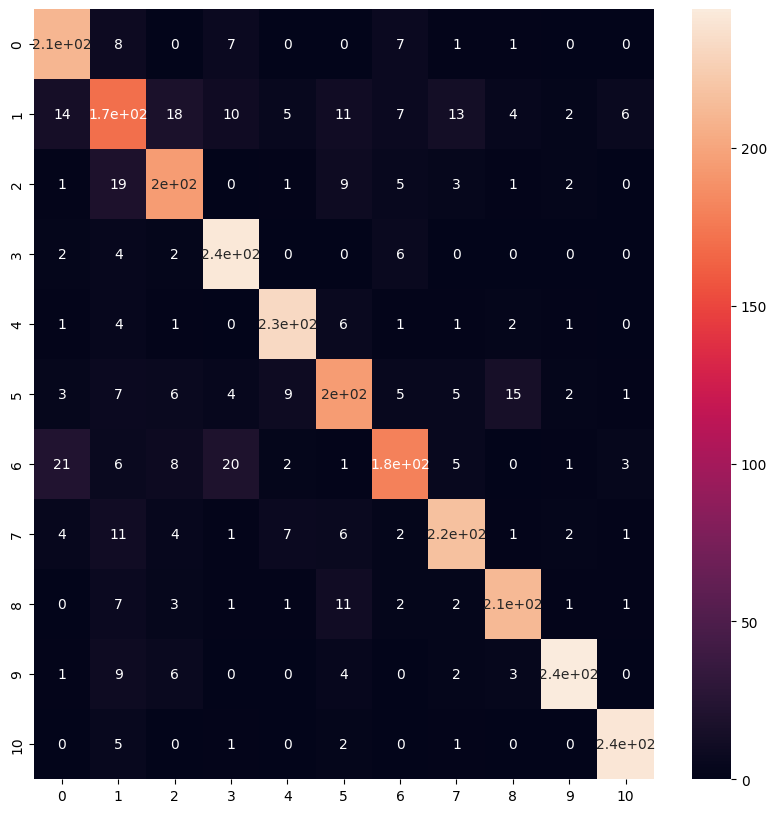

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(CMATRIX, annot=True)

** Needless to say, TF-IDF vectorization is not best and efficient vectorizer we can use , but when you work with FARSI data this vectorizer can be satisfying.**